In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer #to fill the missings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [11]:
data = load_breast_cancer()

In [12]:
data.data.shape

(569, 30)

In [13]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
score_pre = cross_val_score(rfc, data.data, data.target, scoring='accuracy',cv=10).mean()
score_pre

0.9649997839426151

max of scores: 0.967
the corresponding n_estimators: 111


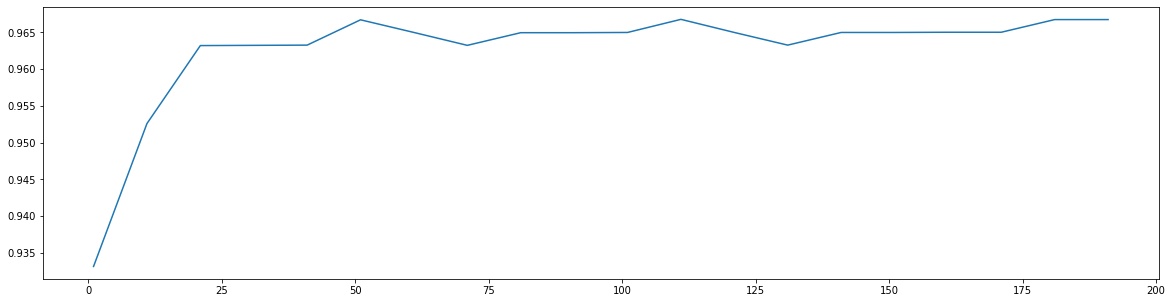

In [14]:
scorel=[]
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,n_jobs=-1
                                ,random_state=0)
    score =cross_val_score(rfc, data.data, data.target
                           ,scoring='accuracy'
                           ,cv=10).mean()
    scorel.append(score)
print("max of scores: {ms:.3f}\nthe corresponding n_estimators: {n}"
      .format(ms=max(scorel),n=1+10*scorel.index(max(scorel))))
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

In [ ]:
#Grid search technique
parameters = {"criterion":("gini","entropy")
              ,"splitter":("best","random")
              ,"max_depth":[*range(2,6)]
              ,"min_samples_leaf":[*range(1,50,5)]
              ,"min_impurity_decrease": [*np.linspace(0,0.5,50)]
}
clf = RandomForestClassifier(n_estimators=50,random_state=30)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(data.data,data.target)

GS.best_params_
GS.best_score_
